In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import PercentFormatter

from itertools import combinations
from datetime import datetime

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["axes.grid"] = 0



# Cohort Analysis

A cohort simply means that a group of people they have same characteristics.

Generally, we have three type of cohort analysis:

   - **Time cohorts** or **Acquisition cohorts**: Groups are divided by first activity.
   - **Behavior cohorts** or **Segment-Based cohorts**: Groups are divided by their behaivors and actions about your service.
   - **Size cohorts**: Size-based cohorts refer to the various sizes of customers who purchase a company’s products or services.


Cohort analysis is a subset of behavioral analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.

Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.



Cohort analysis is a better way of looking at data. Its application is not limited to a single industry or function. For example, eCommerce companies can use cohort analysis to spot products that have more potential for sales growth. In digital marketing, it can help identify web pages that perform well based on time spent on websites, conversions or sign-ups. In product marketing, this analysis can be used to identify the success of feature adoption rate and also to reduce churn rates.


In [2]:
df = pd.read_csv("online_retail_final.csv")
display(df.head())

print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


(392735, 9)


In [3]:
df.dtypes


InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
dtype: object

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
print(f"Min date: {df.InvoiceDate.min()} \nMax date: { df.InvoiceDate.max()}")
print(f"Time difference is: {df.InvoiceDate.max() - df.InvoiceDate.min()}")


Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00
Time difference is: 373 days 04:24:00


Our dataset contains invoice records for more than one year(365 days). Let's apply cohort analysis. We can create monthly cohorts.

We will group customers for first invoice record. Cohort index will be number of months since first transaction.

In [6]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

def get_dates(df, col):

    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day

    return year, month, day

In [7]:
df["InvoiceMonth"] = df["InvoiceDate"].apply(get_month)

df["CohortMonth"] = df.groupby("CustomerID")["InvoiceMonth"].transform("min")

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [9]:
invoice_year, invoice_month, invoice_day = get_dates(df, "InvoiceMonth")
cohort_year, cohort_month, cohort_day = get_dates(df, "CohortMonth")

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df["CohortIndex"] = 12 * year_diff + month_diff + 1

In [10]:
cohort_data = df.groupby(["CohortIndex", "CohortMonth"])["CustomerID"].nunique().reset_index()
cohort_data

,CohortIndex,CohortMonth,CustomerID
0,1,2010-12-01,874
1,1,2011-01-01,409
2,1,2011-02-01,375
3,1,2011-03-01,450
4,1,2011-04-01,297
...,...,...,...
86,11,2011-01-01,151
87,11,2011-02-01,25
88,12,2010-12-01,440
89,12,2011-01-01,48


In [11]:

cohort_pivot = cohort_data.pivot(index = "CohortMonth", columns = "CohortIndex", values = "CustomerID")

cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,874.0,319.0,280.0,329.0,317.0,350.0,316.0,303.0,304.0,345.0,327.0,440.0,231.0
2011-01-01,409.0,91.0,112.0,94.0,131.0,119.0,103.0,100.0,123.0,135.0,151.0,48.0,NaN
2011-02-01,375.0,68.0,69.0,103.0,100.0,90.0,94.0,100.0,92.0,115.0,25.0,NaN,NaN
2011-03-01,450.0,66.0,111.0,90.0,101.0,75.0,119.0,104.0,124.0,38.0,NaN,NaN,NaN
2011-04-01,297.0,64.0,61.0,61.0,56.0,68.0,65.0,77.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,280.0,55.0,48.0,49.0,59.0,65.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,240.0,42.0,38.0,64.0,54.0,78.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,189.0,34.0,39.0,42.0,50.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,170.0,32.0,41.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above data is our cohort table. Its interpretation is simple. For example, We have 874 unique customer with their first transaction is in 2010-12. Its cohort month is 2010-12 and cohort index is 1. Go on the one right cell, it is 319.
Its mean, 319 unique customer retain their customership for next month.

Retention tables show a group of people that visited your site or used your app for the first time during a certain time frame. They also display the progressive ‘drop-off’ or decline in activity over time for that particular group (a cohort).

Marketers can use Retention tables to analyze the quality of users brought by a marketing campaign and compare it to other sources of traffic.



In [12]:
cohort_sizes = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_sizes, axis = 0)
retention.index = retention.index.strftime("%Y-%m")
retention=retention.fillna(0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.364989,0.320366,0.376430,0.362700,0.400458,0.361556,0.346682,0.347826,0.394737,0.374142,0.503432,0.264302
2011-01,1.0,0.222494,0.273839,0.229829,0.320293,0.290954,0.251834,0.244499,0.300733,0.330073,0.369193,0.117359,0.000000
2011-02,1.0,0.181333,0.184000,0.274667,0.266667,0.240000,0.250667,0.266667,0.245333,0.306667,0.066667,0.000000,0.000000
2011-03,1.0,0.146667,0.246667,0.200000,0.224444,0.166667,0.264444,0.231111,0.275556,0.084444,0.000000,0.000000,0.000000
2011-04,1.0,0.215488,0.205387,0.205387,0.188552,0.228956,0.218855,0.259259,0.074074,0.000000,0.000000,0.000000,0.000000
2011-05,1.0,0.196429,0.171429,0.175000,0.210714,0.232143,0.267857,0.092857,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06,1.0,0.175000,0.158333,0.266667,0.225000,0.325000,0.095833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07,1.0,0.179894,0.206349,0.222222,0.264550,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08,1.0,0.188235,0.241176,0.241176,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
retention=retention.fillna(0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.364989,0.320366,0.376430,0.362700,0.400458,0.361556,0.346682,0.347826,0.394737,0.374142,0.503432,0.264302
2011-01,1.0,0.222494,0.273839,0.229829,0.320293,0.290954,0.251834,0.244499,0.300733,0.330073,0.369193,0.117359,0.000000
2011-02,1.0,0.181333,0.184000,0.274667,0.266667,0.240000,0.250667,0.266667,0.245333,0.306667,0.066667,0.000000,0.000000
2011-03,1.0,0.146667,0.246667,0.200000,0.224444,0.166667,0.264444,0.231111,0.275556,0.084444,0.000000,0.000000,0.000000
2011-04,1.0,0.215488,0.205387,0.205387,0.188552,0.228956,0.218855,0.259259,0.074074,0.000000,0.000000,0.000000,0.000000
2011-05,1.0,0.196429,0.171429,0.175000,0.210714,0.232143,0.267857,0.092857,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06,1.0,0.175000,0.158333,0.266667,0.225000,0.325000,0.095833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07,1.0,0.179894,0.206349,0.222222,0.264550,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08,1.0,0.188235,0.241176,0.241176,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


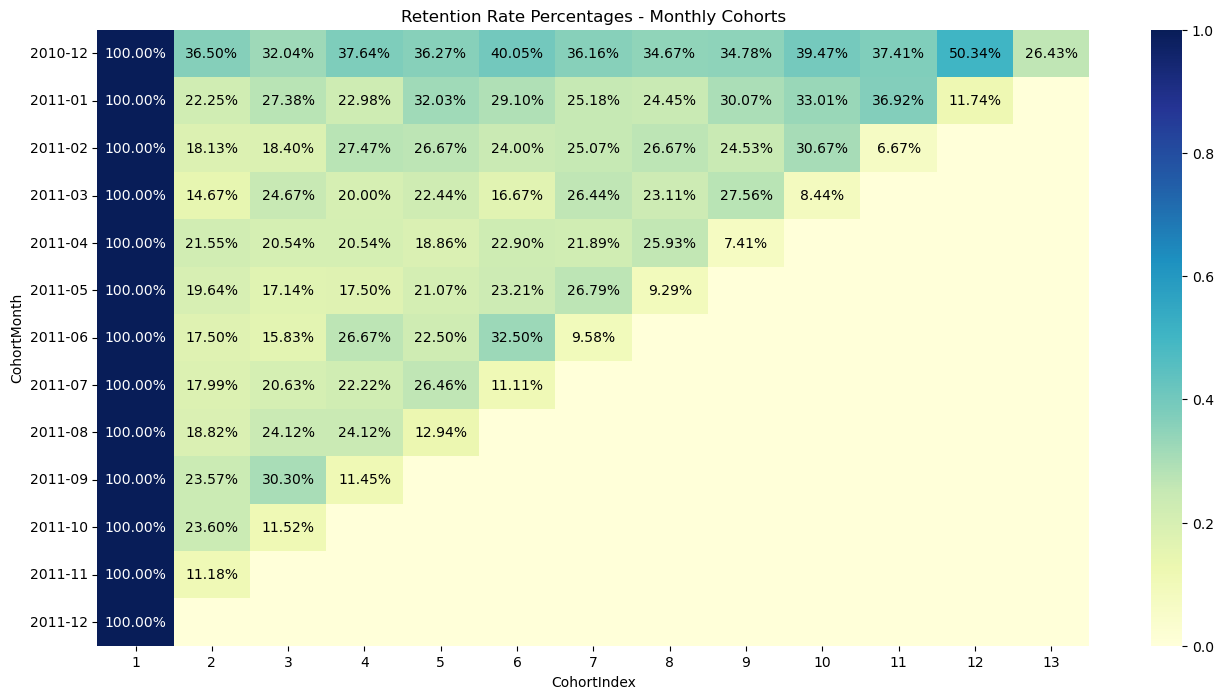

In [14]:

plt.figure(figsize=(16, 8))

sns.heatmap(retention, cmap = "YlGnBu", fmt = ".2%")
# Manually annotate all cells

for i in range(len(retention)):
    for j in range(len(retention.columns)):
        if(retention.iloc[i,j]!=0):
                color="black"
                if(retention.iloc[i,j]==1):
                        color="white"
                plt.text(j + 0.5, i + 0.5, f'{retention.iloc[i, j]:.2%}',ha='center',
                         va='center',fontsize=10, color=color)

plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation = 0)
plt.show()

Let's look at above retention rate chart and interpret it.

40.05% of customers that made their first shopping in January 2011, use this company after five months.

In [15]:
customer_per_month = df.groupby("CohortMonth")["CustomerID"].nunique().values
customers = customer_per_month.cumsum()
customers = customers[::-1]
customers

array([4298, 4259, 3937, 3581, 3284, 3114, 2925, 2685, 2405, 2108, 1658,
       1283,  874], dtype=int64)

In [16]:
customer_in_month = df.groupby("CohortIndex")["CustomerID"].nunique()
customer_in_month

CohortIndex
1     4298
2      961
3      930
4      907
5      890
6      866
7      795
8      710
9      665
10     633
11     503
12     488
13     231
Name: CustomerID, dtype: int64

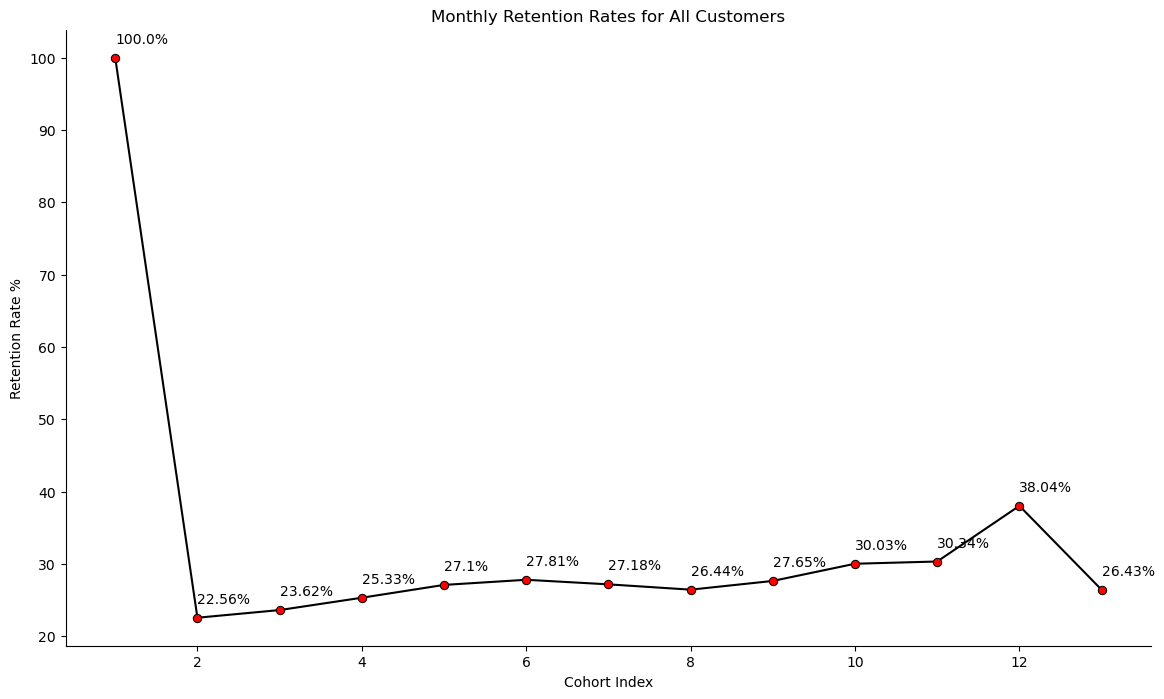

In [17]:
#plt.rcParams["axes.facecolor"] = "#A2A2A2"
fig, ax = plt.subplots(figsize = (14, 8))
ax.grid(False)
x = customer_in_month.index
y = 100*(customer_in_month / customers)

sns.lineplot(x = x, y = y,  color = "black", marker = "o", markerfacecolor = "red", markeredgecolor = "#000000")

for x, y in zip(x, y):
    plt.text(x, y + 2, s = str(round(y, 2)) + "%")

plt.xlabel("Cohort Index")
plt.ylabel("Retention Rate %")
plt.title("Monthly Retention Rates for All Customers")
sns.despine()
plt.show()



**Retention rate increases significantly for last months of the year.**

Probably, Thanksgiving, Black Friday and Christmas causes it. There are lots of special day at the end of year.

In [18]:
monthly_customer_price_df = df.groupby("InvoiceMonth").agg({"TotalPrice": "sum",
                                                            "CustomerID": "nunique"})

monthly_customer_price_df

,TotalPrice,CustomerID
InvoiceMonth,,
2010-12-01,477001.27,874
2011-01-01,402460.88,728
2011-02-01,384935.12,746
2011-03-01,501435.63,959
2011-04-01,389147.37,843
2011-05-01,578653.77,1039
2011-06-01,502033.11,981
2011-07-01,495787.75,937
2011-08-01,512410.08,920


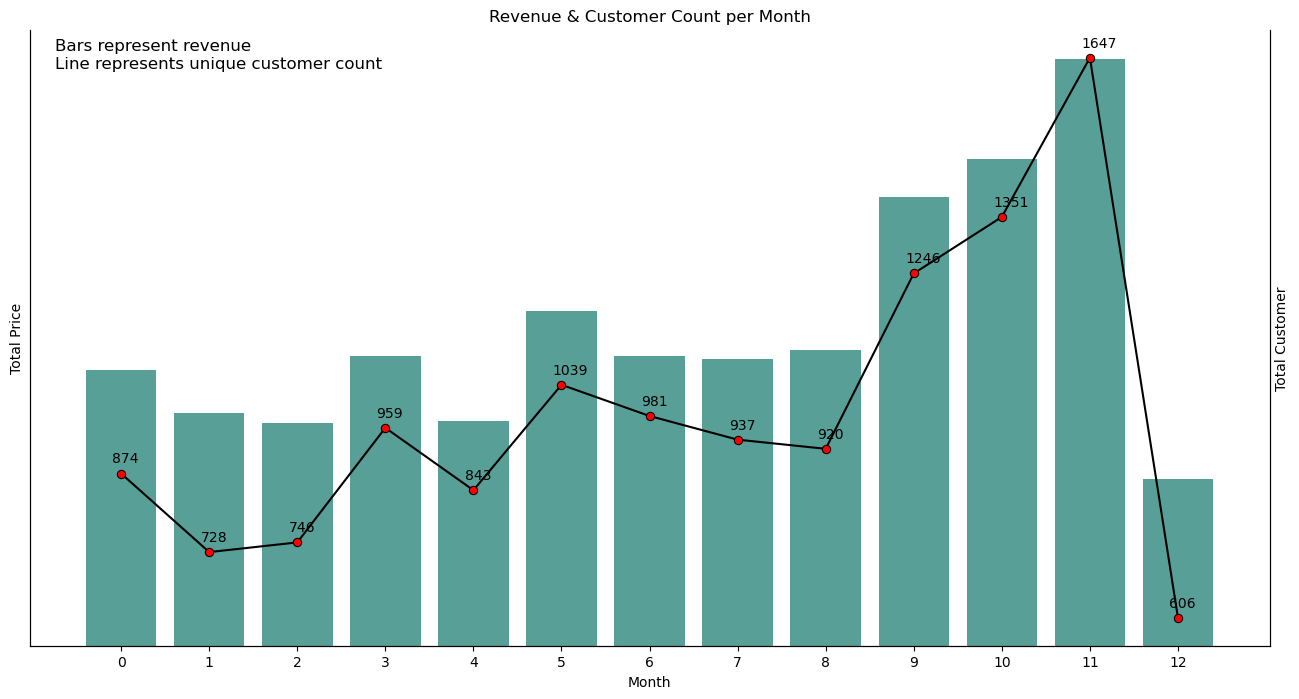

In [19]:
fig, ax = plt.subplots(figsize = (16, 8))


sns.barplot(x = np.arange(len(monthly_customer_price_df.index)), y = monthly_customer_price_df.TotalPrice, ax = ax,
            color = "#008878",alpha=0.7)
ax2 = ax.twinx()
sns.lineplot(x = np.arange(len(monthly_customer_price_df.index)), y = monthly_customer_price_df.CustomerID, ax = ax2,
            color = "black", marker = "o", markerfacecolor = "red", markeredgecolor = "#000000")

ax.set_yticks([])
ax2.set_yticks([])
ax2.set_ylabel("Total Customer")
ax.set_ylabel("Total Price")
ax.set_xlabel("Month")
plt.title("Revenue & Customer Count per Month")
ax.text(-0.75, 1000000, "Bars represent revenue \nLine represents unique customer count",
        fontsize = 12)
for x, y in zip(np.arange(len(monthly_customer_price_df.index)),  monthly_customer_price_df.CustomerID):
    ax2.text(x -0.1, y + 20 , y, color = "black")

sns.despine(left = False, right = False, bottom = False, top = True)
plt.show()



#  Pareto Principle

The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes (the “vital few”).

Other names for this principle are the 80/20 rule, the law of the vital few, or the principle of factor sparsity.


**Lets implement Pareto's 80-20 rule to our dataset**. We have two hypothesis:

    1) 80% of company's revenue comes from 20% of total customers.

    2) 80% of company's revenue comes from 20% of total products.

**To check these hypothesis, we need only two things.**

1) Individual sale records for customer/product

2) Calculating cumulative sum for them

I define below functions for calculation and visualization.

**prepare_pareto_data** finds individual revenue per customer/product and calculates cumulative percentage of them.

**create_pareto_plot** takes output from these data and visualize it.

In [20]:
def prepare_pareto_data(df, col, price):

    df_price = pd.DataFrame(df.groupby(col)[price].sum())
    df_price = df_price.sort_values(price, ascending = False)

    df_price["CumulativePercentage"] = (df_price[price].cumsum() / df_price[price].sum() * 100).round(2)

    return df_price

In [21]:
def create_pareto_plot(df, col, price, log = True):
    ylabel=""
    ycol=""
    #plt.rcParams["axes.facecolor"] = "white"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150)
    #plt.rcParams["axes.grid"] = False

    if log == True:
           ycol = np.log(df[price])
           ylabel ="Total Price (Log - Scale)"
        
    else:
           ycol = df[price]
           ylabel="Total Price"
    sns.barplot(x = np.arange(len(df)), y = ycol,  ax = ax, color = "#008878")
    ax.set_ylabel(ylabel)
    ax2 = ax.twinx()

    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "red")
    ax2.axhline(80, color = "blue", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "blue", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#0019AA", linestyle = "dashed", alpha = 0.1)

   

    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "Customers" if col == "CustomerID" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    #sns.despine(left = True, right = True, bottom = True, top = True)
    sns.despine( top = True)
    plt.show()

<a id="section-three-one"></a>

# 3.1) Pareto Chart for Customers

In [23]:
customer_price = prepare_pareto_data(df, "CustomerID", "TotalPrice")

customer_price.head(10)

,TotalPrice,CumulativePercentage
CustomerID,,
14646.0,189796.00,2.65
14911.0,129795.43,4.46
12415.0,81455.09,5.60
14156.0,81329.92,6.73
18102.0,80619.70,7.86
17511.0,78595.72,8.95
15311.0,57178.46,9.75
13089.0,56618.82,10.54
14096.0,52147.65,11.27


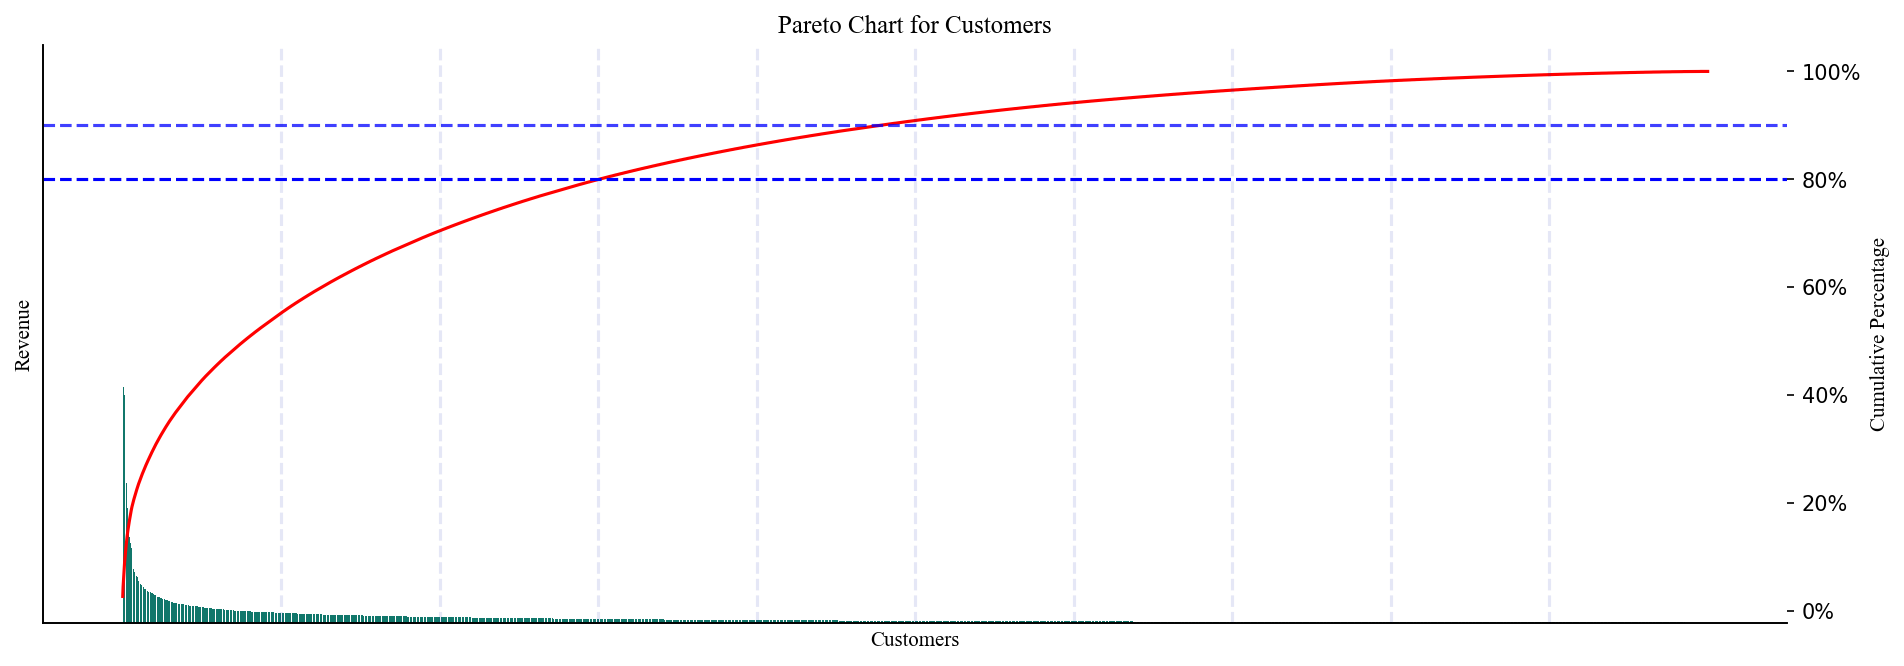

In [24]:
create_pareto_plot(customer_price, "CustomerID", "TotalPrice", log = False)

We can also plot it in log scale. It helps us for better visualization.

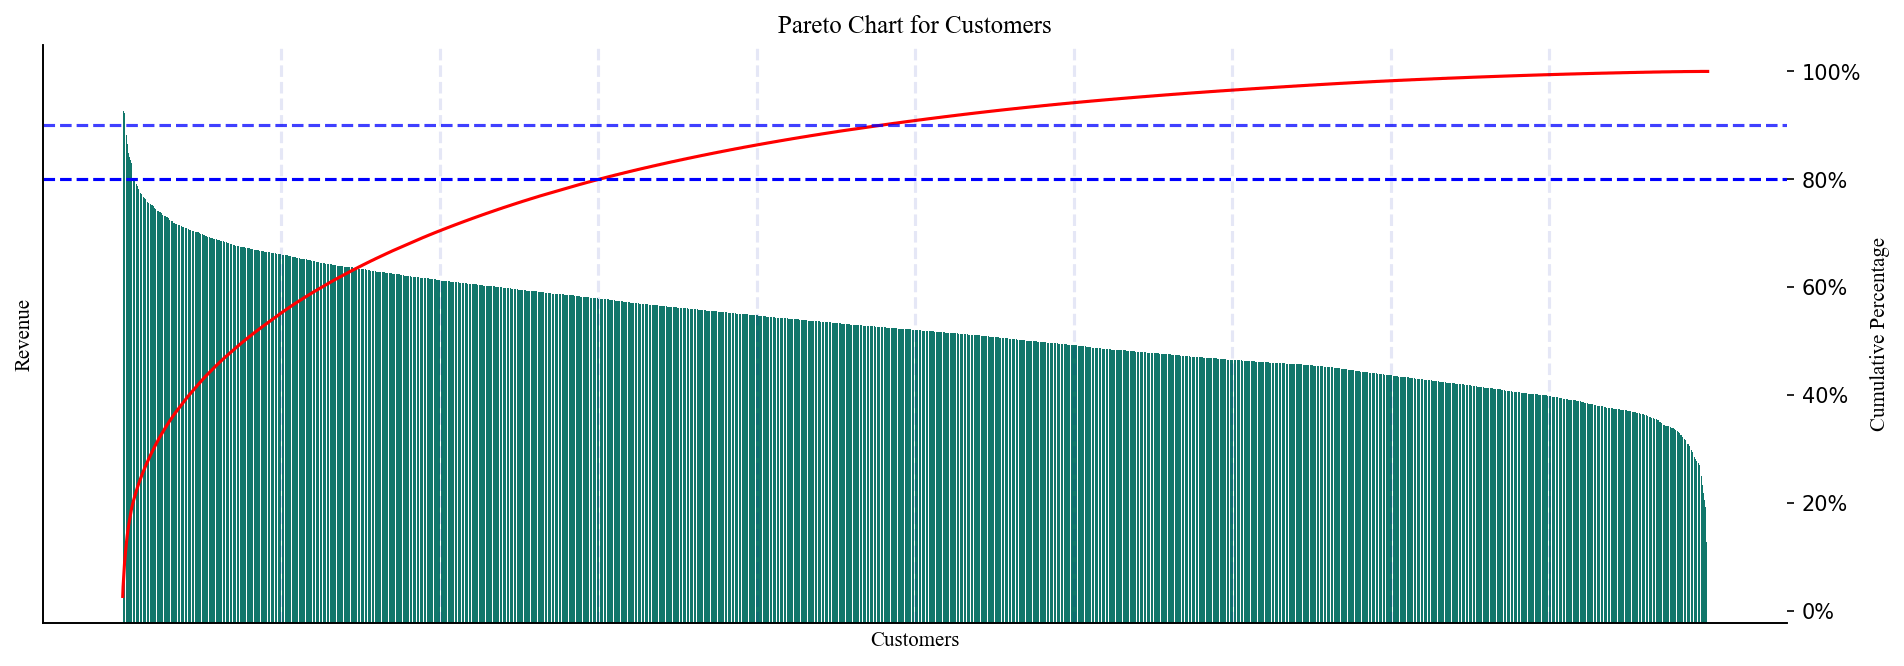

In [25]:
create_pareto_plot(customer_price, "CustomerID", "TotalPrice", log = True)

Well, lets interpret these two charts. Actually, we don't need to write a lot of things.

We can see that 80% of company's revenue comes from top 30% of customers.

Also, 90% of company's revenue comes from top ~50% of customers.

<a id="section-three-two"></a>

# 3.2) Pareto Chart for Products

In [26]:
item_price = prepare_pareto_data(df, "StockCode", "TotalPrice")

item_price.head(10)

,TotalPrice,CumulativePercentage
StockCode,,
22423,132100.75,1.84
85123A,68282.78,2.80
47566,61166.83,3.65
85099B,57382.08,4.45
79321,37464.27,4.97
84879,37428.74,5.50
22086,35337.23,5.99
23298,31210.55,6.42
22960,30038.77,6.84


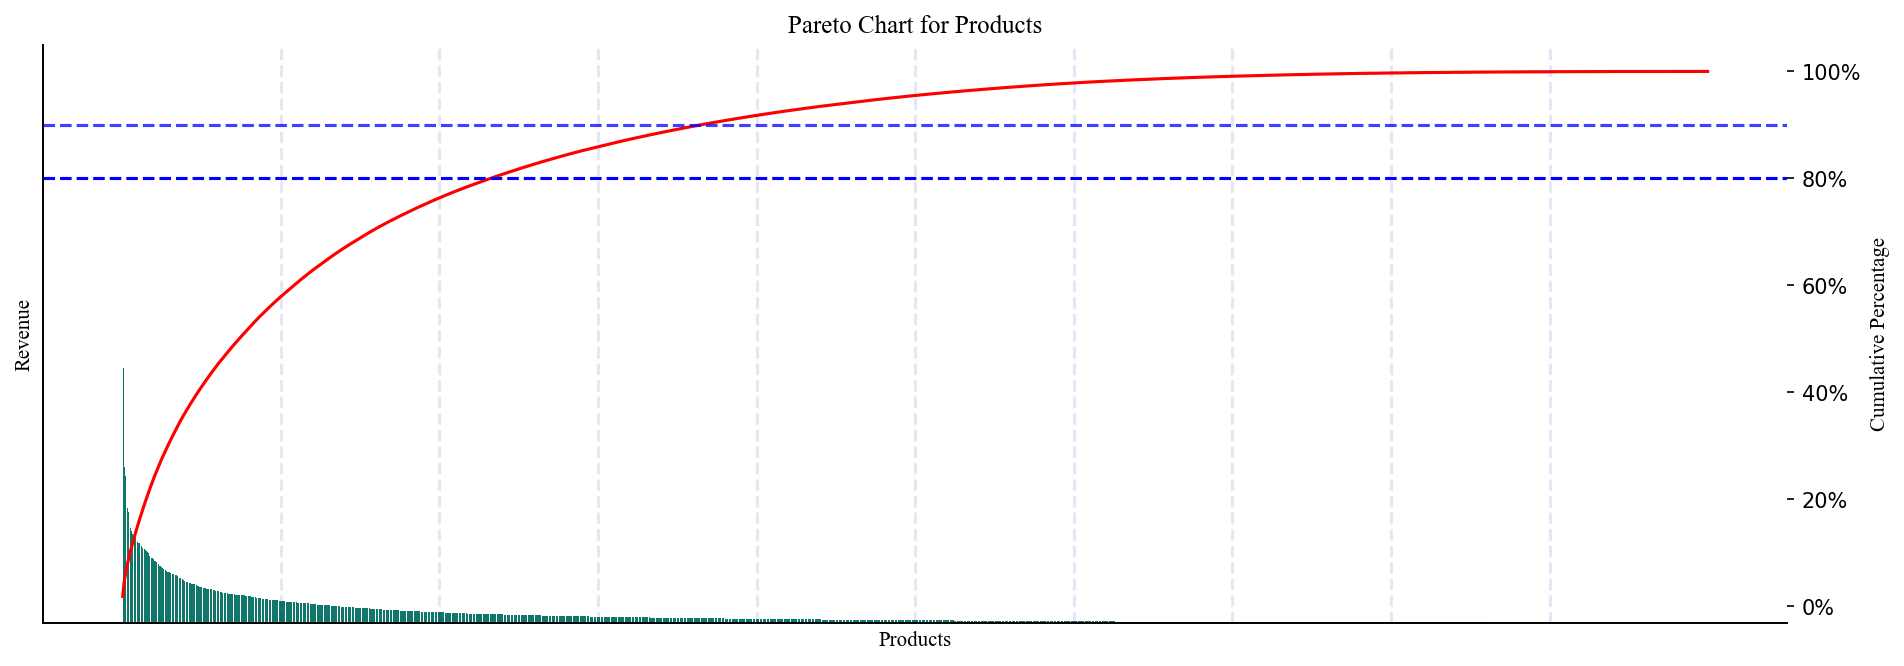

In [27]:
create_pareto_plot(item_price, "StockCode", "TotalPrice", log = False)

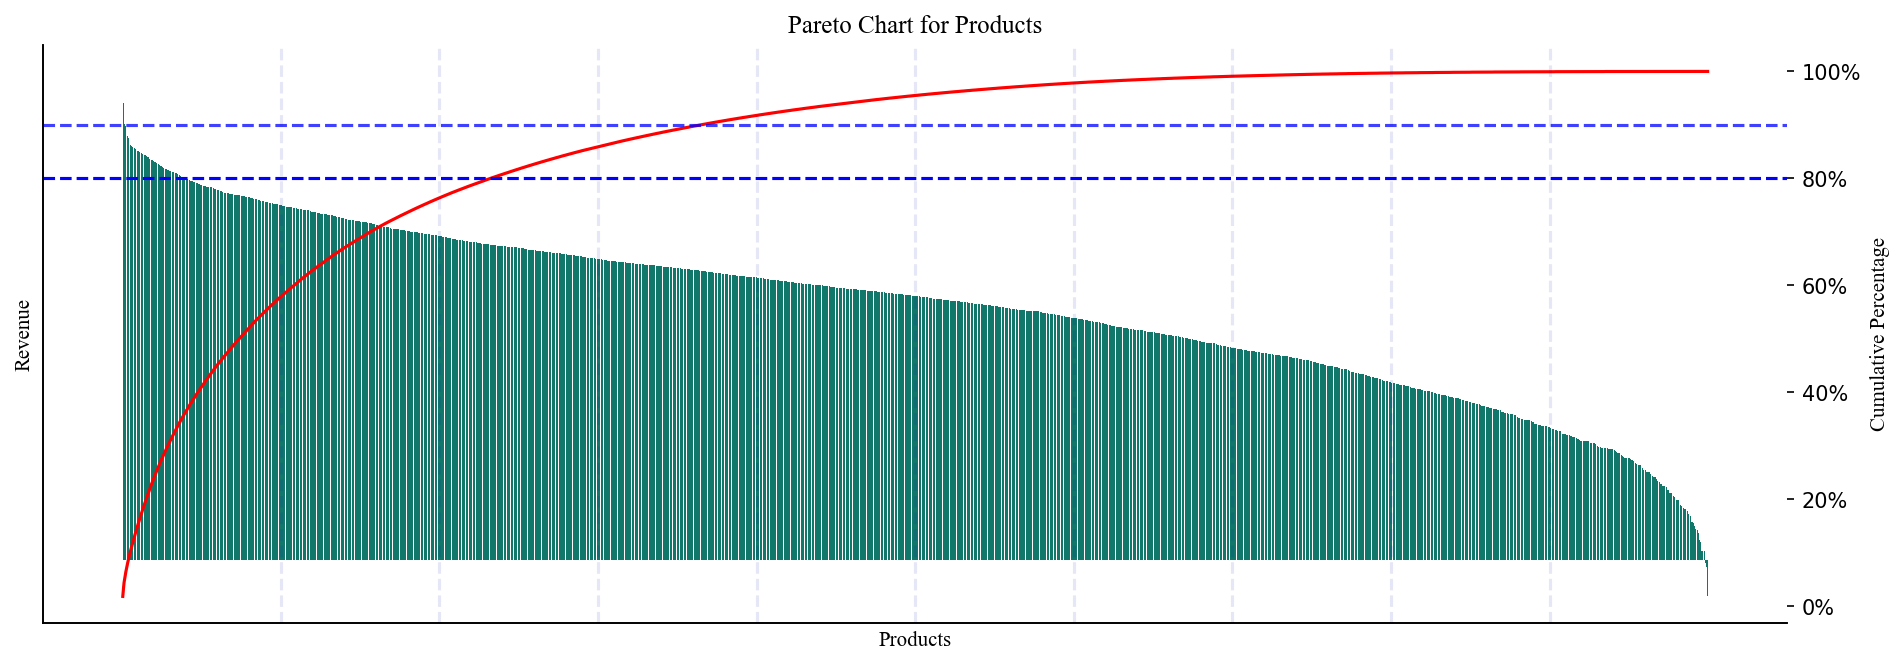

In [28]:
create_pareto_plot(item_price, "StockCode", "TotalPrice")

We can see that 80% of company's revenue comes from top 20-25% of products that have most revenue.

Also, 90% of company's revenue comes from ~35% of products that have most revenue.

Maybe, if the company reduce by half its variety of items, revenue couldn't decrease significantly.

In [29]:
top_customers = customer_price[customer_price.CumulativePercentage <= 80].index.tolist()

products_for_top_customers = df[df.CustomerID.isin(top_customers)].Description.drop_duplicates().values.tolist()

products_for_other_customers = df[~df.CustomerID.isin(top_customers)].Description.drop_duplicates().values.tolist()

In [32]:
len(top_customers)

1292

In [33]:
len(products_for_top_customers) 

3712

In [34]:
len(products_for_other_customers)

3588